# データの読み込み

In [3]:
import sys,os
sys.path.append(os.pardir)
from DataReader import DataReader
dr = DataReader()
train_df, test_df = dr.get_data()

Index(['client', 'close', 'price_am', 'price_pm', 'Month', 'DayofMonth',
       'DayofWeek', 'year', 'y'],
      dtype='object')


# imports

In [4]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 日にちごとの平均

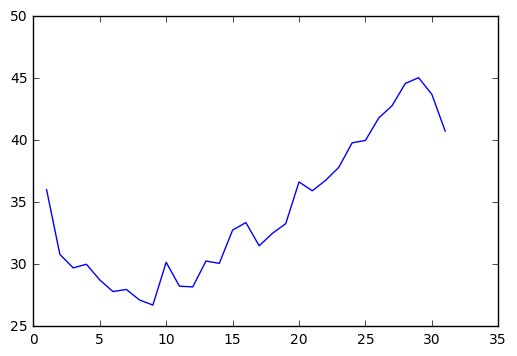

In [5]:
plt.plot(train_df.groupby("DayofMonth")["y"].mean(),)

- 月末が多い

# 曜日ごとの平均

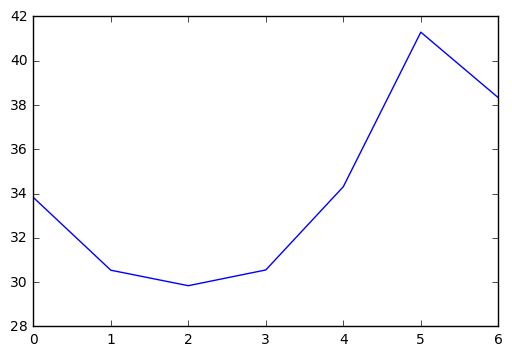

In [7]:
plt.plot(train_df.groupby("DayofWeek")["y"].mean(),label='train')

- 土日が多い

# 月ごとの平均

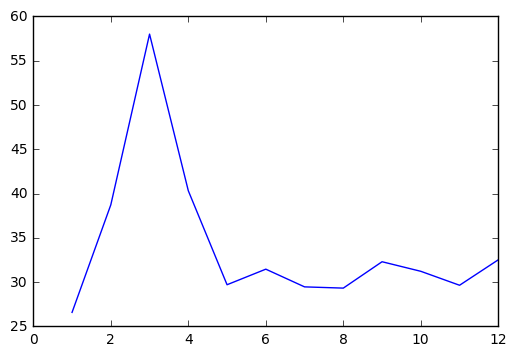

In [8]:
plt.plot(train_df.groupby("Month")["y"].mean(),label='train')

- 3月が圧倒的に多い

# 年ごとの平均

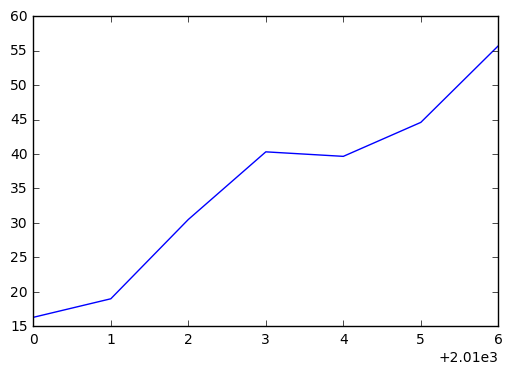

In [9]:
plt.plot(train_df.groupby("year")["y"].mean(),label='train')

- 売上は徐々に増加している

# その他の傾向

In [22]:
client_0_num = len(train_df[train_df["client"] == 0])
print("法人が絡まない件数")
print(client_0_num)
print("法人が絡む件数")
print(len(train_df) - client_0_num)

法人が絡まない件数
1895
法人が絡む件数
206


# 適当な機械学習

In [43]:
# データの分類
from sklearn.model_selection import train_test_split

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# 説明変数と目的変数
X = train_df.drop("y", axis=1)
Y = train_df.y

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=50)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

def score(y_pred, y):
    abs_list = [abs(y_pred_ - y_) for (y_pred_, y_) in zip(y_pred, y)]
    return sum(abs_list) / len(abs_list)

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰のインスタンス
model = LogisticRegression()
clf = model.fit(X_train_std,y_train)

print("ロジスティック回帰")
y_pred = clf.predict(X_train_std)
print("train:", score(y_pred,y_train))
y_pred = clf.predict(X_test_std)
print("test:" , score(y_pred,y_test))


# 決定木
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier

# 決定木インスタンス（エントロピー、深さ5）
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=7, random_state=50)
tree_model.fit(X_train_std,y_train)

print("決定木")
y_pred = tree_model.predict(X_train_std)
print("train:", score(y_pred,y_train))
y_pred = tree_model.predict(X_test_std)
print("test:", score(y_pred,y_test))

# k-NN
from sklearn.neighbors import  KNeighborsClassifier

# ここでは6としてしまう
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_std,y_train)
    
print("k-NN")
y_pred = clf.predict(X_train_std)
print("train:", score(y_pred,y_train))
y_pred = clf.predict(X_test_std)
print("test:" , score(y_pred,y_test))

# SVM
from sklearn.svm import LinearSVC

model = LinearSVC()
clf = model.fit(X_train_std,y_train)

print("SVM")
y_pred = clf.predict(X_train_std)
print("train:", score(y_pred,y_train))
y_pred = clf.predict(X_test_std)
print("test:" , score(y_pred,y_test))

ロジスティック回帰
train: 8.99523809524
test: 8.80760095012
決定木
train: 6.6755952381
test: 7.23990498812
k-NN
train: 8.5625
test: 10.1828978622
SVM
train: 9.05833333333
test: 9.41805225653
